In [1]:
# подключение основных библиотек
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения



In [2]:
#запускаем метрики и вспомогательные модули 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV

#подключение библиотеки для вычисления метрик
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_auc_score, roc_curve

#Подгружаем таблички метрик 
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
#подгружаем и просматриваем наш датасет на 1660 файлов
df = pd.read_csv('1660_films.csv')
df

,ID_kinopoisk,week,month,screens,budget,age_R,time,genre_box_buget,genre_avr_kinopoisk_R,genre_avr_box,...,skr2_box_buget,skr2_avr_kinopoisk_R,skr2_avr_box,skr2_avr_views,box_budget,kinopoisk_R,box,views,rezult,rezult4
0,70952.0,7,2,100,46096480.0,12.0,115.0,0.51,6.18,66377566,...,1.17,7.40,54000000.0,551000.0,1.17,7.4,54000000,551000,0,1
1,77396.0,14,4,117,57620600.0,0.0,98.0,0.94,5.23,181394667,...,0.78,4.80,45000000.0,464000.0,0.78,4.8,45000000,464000,0,0
2,79850.0,28,7,315,121003260.0,16.0,115.0,0.94,5.23,181394667,...,1.66,6.33,209666667.0,2029000.0,3.84,6.1,465000000,4400000,1,3
3,253754.0,40,9,47,46096480.0,12.0,101.0,0.51,6.18,66377566,...,0.25,5.90,24275000.0,124000.0,0.16,6.4,7300000,61000,0,0
4,252013.0,44,10,188,57620600.0,6.0,90.0,1.19,6.07,148983326,...,0.33,6.70,19000000.0,295000.0,0.33,6.7,19000000,295000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656,4493006.0,15,4,1656,39100000.0,12.0,91.0,1.88,5.36,129218872,...,0.25,5.90,24275000.0,124000.0,0.52,6.3,20396022,75750,0,0
1657,4400163.0,15,4,235,51790451.0,18.0,75.0,0.51,6.18,66377566,...,0.02,0.00,881000.0,2634.0,0.02,6.0,881000,2634,0,0
1658,5059142.0,16,4,23,79817750.0,16.0,101.0,0.51,6.18,66377566,...,1.04,7.10,16541000.0,84123.0,0.29,6.0,82000,245,0,0
1659,5002368.0,16,4,66,79817750.0,18.0,120.0,0.51,6.18,66377566,...,0.00,0.00,496626.0,1411.0,0.29,6.0,496626,1411,0,0


In [4]:
#Отбираем признаки для работы и  столбец с откликами
cols = ["week", "month","screens","budget","age_R","time",
        "genre_box_buget","genre_avr_kinopoisk_R", "genre_avr_box","genre_avr_views",
        "genre2_box_buget","genre2_avr_kinopoisk_R","genre2_avr_box","genre2_avr_views",
        "dir_box_buget", "dir_avr_kinopoisk_R","dir_avr_box","dir_avr_views",
        "skr1_box_buget", "skr1_avr_kinopoisk_R", "skr1_avr_box", "skr1_avr_views",
        "skr2_box_buget", "skr2_avr_kinopoisk_R","skr2_avr_box", "skr2_avr_views"] # назначаем столбцы 
X = df[cols] # отбираем оцениваемые признаки-предикторы
y = df["rezult4"] # отбираем столбец с откликами

In [5]:
# Увеличение выборки с использованием библиотеки imbalanced-learn (Python)
from imblearn.over_sampling import RandomOverSampler

# Создание экземпляра RandomOverSampler
ros = RandomOverSampler()

# Применение увеличения выборки к данным
X, y = ros.fit_resample(X, y)

In [6]:
from sklearn.preprocessing import LabelBinarizer

In [7]:
# Преобразование целевых переменных в кодировку one-hot
lb = LabelBinarizer()
y = lb.fit_transform(y)

In [12]:
from sklearn.model_selection import train_test_split
#Делим выборку на тренинговую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) # делим выборку 70/30 - тренинговая/тестовая

In [13]:
# Импортируем tensorflow
import tensorflow as tf

In [14]:
# Создание модели нейросети
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(26,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])


In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Создаем коллбэк ModelCheckpoint
checkpoint = ModelCheckpoint('bestmodel.hdf5', random_state = 42, monitor='val_accuracy', save_best_only=True, mode='max')


In [17]:
# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Обучение модели
history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test, y_test), callbacks=[checkpoint])

Epoch 1/300
118/118 [==============================] - 1s 6ms/step - loss: 7994504.0000 - accuracy: 0.5143 - val_loss: 1859186.0000 - val_accuracy: 0.5662
Epoch 2/300
118/118 [==============================] - 0s 3ms/step - loss: 1595625.5000 - accuracy: 0.6178 - val_loss: 1244552.7500 - val_accuracy: 0.5730
Epoch 3/300
118/118 [==============================] - 0s 3ms/step - loss: 1376815.2500 - accuracy: 0.6367 - val_loss: 760251.7500 - val_accuracy: 0.6887
Epoch 4/300
118/118 [==============================] - 0s 3ms/step - loss: 833376.3125 - accuracy: 0.6783 - val_loss: 1212753.0000 - val_accuracy: 0.6083
Epoch 5/300
118/118 [==============================] - 0s 4ms/step - loss: 967867.3125 - accuracy: 0.6645 - val_loss: 680540.7500 - val_accuracy: 0.7166
Epoch 6/300
118/118 [==============================] - 0s 3ms/step - loss: 632586.5000 - accuracy: 0.7110 - val_loss: 581524.6875 - val_accuracy: 0.7160
Epoch 7/300
118/118 [==============================] - 0s 4ms/step - loss: 6

118/118 [==============================] - 0s 3ms/step - loss: 180615.3594 - accuracy: 0.8490 - val_loss: 155246.4531 - val_accuracy: 0.8800
Epoch 55/300
118/118 [==============================] - 0s 3ms/step - loss: 165862.4219 - accuracy: 0.8609 - val_loss: 138389.5000 - val_accuracy: 0.8713
Epoch 56/300
118/118 [==============================] - 0s 3ms/step - loss: 131364.7031 - accuracy: 0.8856 - val_loss: 157069.1250 - val_accuracy: 0.8385
Epoch 57/300
118/118 [==============================] - 0s 3ms/step - loss: 156683.8281 - accuracy: 0.8742 - val_loss: 93842.4062 - val_accuracy: 0.9035
Epoch 58/300
118/118 [==============================] - 0s 3ms/step - loss: 210921.8906 - accuracy: 0.8588 - val_loss: 400906.9688 - val_accuracy: 0.7748
Epoch 59/300
118/118 [==============================] - 0s 3ms/step - loss: 156270.2500 - accuracy: 0.8761 - val_loss: 90880.8047 - val_accuracy: 0.8360
Epoch 60/300
118/118 [==============================] - 0s 3ms/step - loss: 96705.5859 - ac

118/118 [==============================] - 0s 3ms/step - loss: 83077.4531 - accuracy: 0.8970 - val_loss: 48850.0547 - val_accuracy: 0.8923
Epoch 108/300
118/118 [==============================] - 0s 3ms/step - loss: 27989.9551 - accuracy: 0.9421 - val_loss: 45349.2383 - val_accuracy: 0.9276
Epoch 109/300
118/118 [==============================] - 0s 3ms/step - loss: 75622.1641 - accuracy: 0.9236 - val_loss: 132215.5469 - val_accuracy: 0.8917
Epoch 110/300
118/118 [==============================] - 0s 3ms/step - loss: 53371.6484 - accuracy: 0.9214 - val_loss: 42189.5938 - val_accuracy: 0.9171
Epoch 111/300
118/118 [==============================] - 0s 3ms/step - loss: 52087.5508 - accuracy: 0.9220 - val_loss: 133006.2344 - val_accuracy: 0.8608
Epoch 112/300
118/118 [==============================] - 0s 3ms/step - loss: 49957.0312 - accuracy: 0.9145 - val_loss: 46649.7969 - val_accuracy: 0.9257
Epoch 113/300
118/118 [==============================] - 0s 3ms/step - loss: 57808.1523 - accu

118/118 [==============================] - 0s 3ms/step - loss: 12262.6113 - accuracy: 0.9509 - val_loss: 25378.6230 - val_accuracy: 0.9264
Epoch 161/300
118/118 [==============================] - 0s 3ms/step - loss: 26620.6406 - accuracy: 0.9260 - val_loss: 23061.5488 - val_accuracy: 0.9350
Epoch 162/300
118/118 [==============================] - 0s 3ms/step - loss: 12623.8086 - accuracy: 0.9488 - val_loss: 22246.7598 - val_accuracy: 0.9406
Epoch 163/300
118/118 [==============================] - 0s 3ms/step - loss: 11684.5967 - accuracy: 0.9475 - val_loss: 20065.8438 - val_accuracy: 0.9647
Epoch 164/300
118/118 [==============================] - 0s 3ms/step - loss: 9407.4014 - accuracy: 0.9536 - val_loss: 31997.2285 - val_accuracy: 0.9165
Epoch 165/300
118/118 [==============================] - 0s 3ms/step - loss: 9616.5391 - accuracy: 0.9599 - val_loss: 50105.3711 - val_accuracy: 0.8756
Epoch 166/300
118/118 [==============================] - 0s 3ms/step - loss: 11025.9258 - accuracy

Epoch 214/300
118/118 [==============================] - 0s 3ms/step - loss: 1253.1536 - accuracy: 0.7667 - val_loss: 5603.4243 - val_accuracy: 0.7686
Epoch 215/300
118/118 [==============================] - 0s 3ms/step - loss: 904.3690 - accuracy: 0.7848 - val_loss: 5418.5835 - val_accuracy: 0.7915
Epoch 216/300
118/118 [==============================] - 0s 3ms/step - loss: 389.9315 - accuracy: 0.7816 - val_loss: 5225.1797 - val_accuracy: 0.7692
Epoch 217/300
118/118 [==============================] - 0s 3ms/step - loss: 1370.0507 - accuracy: 0.7702 - val_loss: 9842.7139 - val_accuracy: 0.7908
Epoch 218/300
118/118 [==============================] - 0s 3ms/step - loss: 6792.7109 - accuracy: 0.7346 - val_loss: 20988.9746 - val_accuracy: 0.7054
Epoch 219/300
118/118 [==============================] - 0s 3ms/step - loss: 11390.9717 - accuracy: 0.6470 - val_loss: 13548.1660 - val_accuracy: 0.6176
Epoch 220/300
118/118 [==============================] - 0s 3ms/step - loss: 2885.7192 - accu

Epoch 269/300
118/118 [==============================] - 0s 3ms/step - loss: 1.0499 - accuracy: 0.4475 - val_loss: 1208.9829 - val_accuracy: 0.4369
Epoch 270/300
118/118 [==============================] - 0s 3ms/step - loss: 1.0498 - accuracy: 0.4475 - val_loss: 1208.9829 - val_accuracy: 0.4369
Epoch 271/300
118/118 [==============================] - 0s 3ms/step - loss: 1.0500 - accuracy: 0.4475 - val_loss: 1208.9830 - val_accuracy: 0.4369
Epoch 272/300
118/118 [==============================] - 0s 3ms/step - loss: 1.0499 - accuracy: 0.4475 - val_loss: 1208.9829 - val_accuracy: 0.4369
Epoch 273/300
118/118 [==============================] - 0s 3ms/step - loss: 1.0499 - accuracy: 0.4475 - val_loss: 1208.9829 - val_accuracy: 0.4369
Epoch 274/300
118/118 [==============================] - 0s 3ms/step - loss: 1.0499 - accuracy: 0.4475 - val_loss: 1208.9832 - val_accuracy: 0.4369
Epoch 275/300
118/118 [==============================] - 0s 3ms/step - loss: 1.0499 - accuracy: 0.4475 - val_los

In [20]:
# Получение значений метрик обучения
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

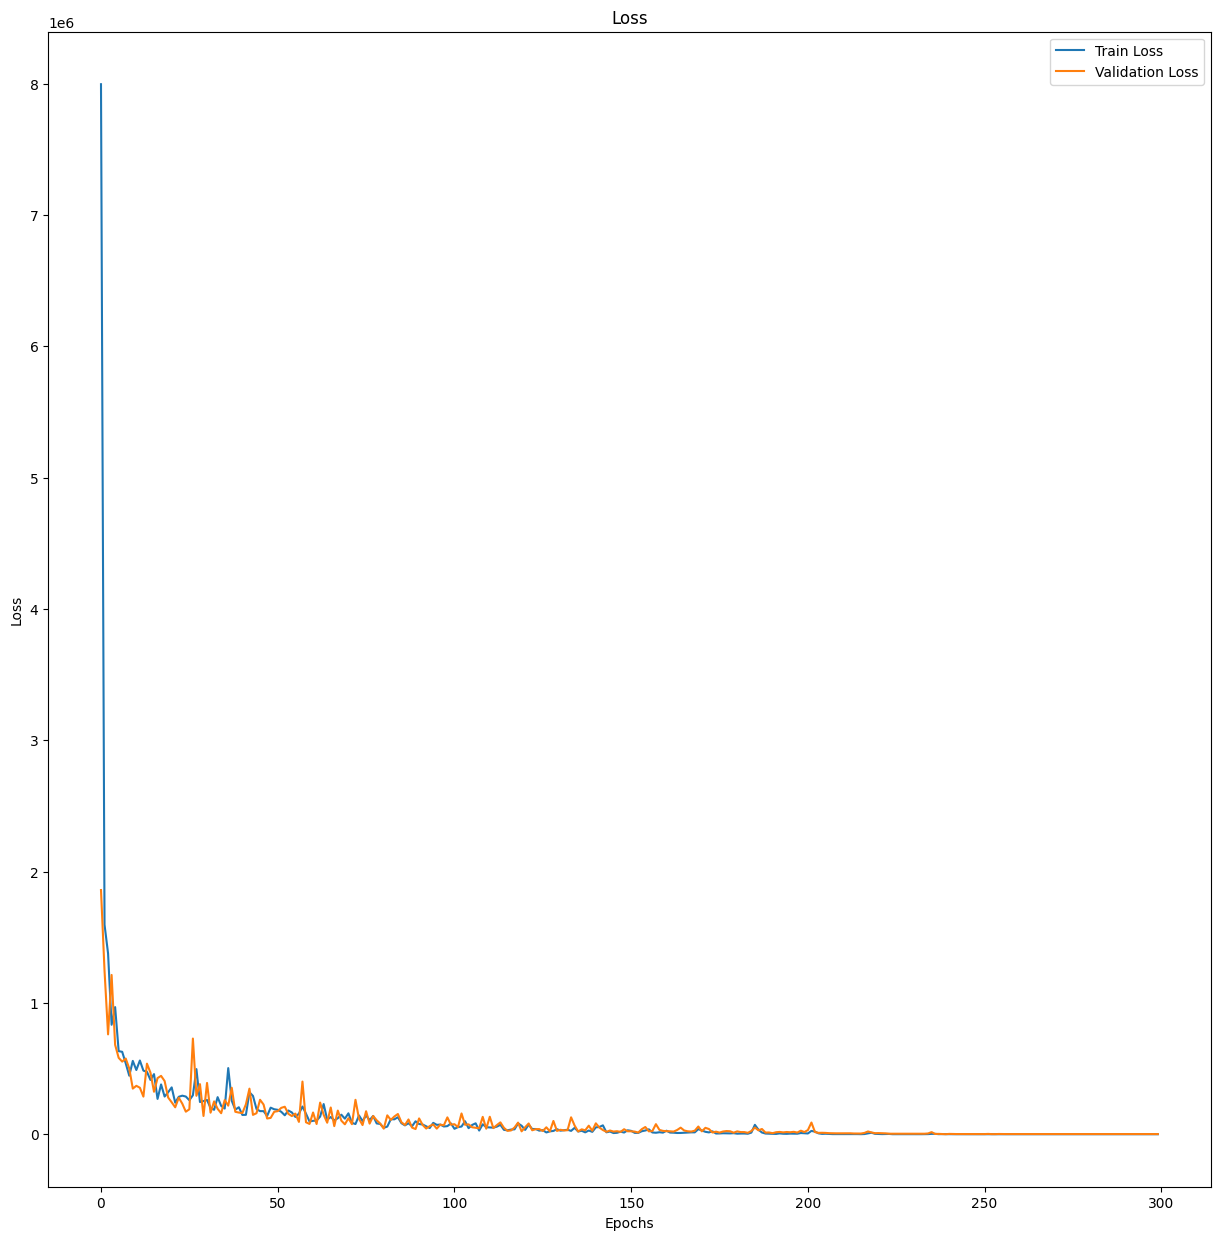

In [21]:
# График потерь
plt.figure(figsize=(15, 15))
plt.plot(range(len(train_loss)), train_loss, label='Train Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


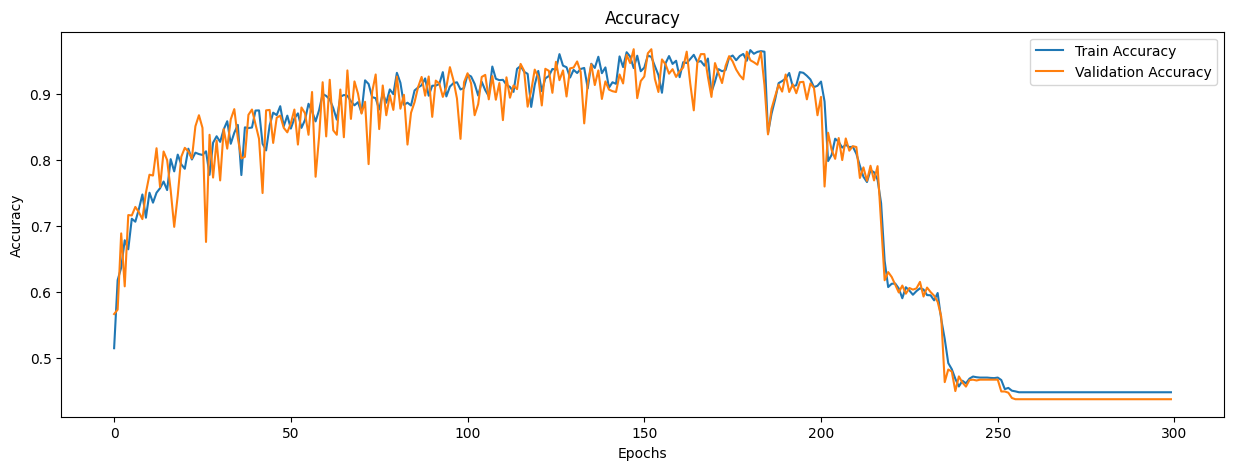

In [22]:
# График точности
plt.figure(figsize=(15, 5))
plt.plot(range(len(train_acc)), train_acc, label='Train Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
#загружаем сохраненную модель 
model = tf.keras.models.load_model('bestmodel.hdf5')

In [25]:
# Вывод Classification Report
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_orig = np.argmax(y_test, axis=1)

print(classification_report(y_test_orig, y_pred, digits=4))

51/51 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0     0.9876    0.9215    0.9534       433
           1     0.9380    0.9618    0.9497       393
           2     0.9819    0.9948    0.9883       381
           3     0.9669    1.0000    0.9832       409

    accuracy                         0.9684      1616
   macro avg     0.9686    0.9695    0.9686      1616
weighted avg     0.9689    0.9684    0.9683      1616



In [26]:
# Вывод Confusion Matrix
cm = confusion_matrix(y_test_orig, y_pred)
print(cm)

[[399  25   4   5]
 [  5 378   3   7]
 [  0   0 379   2]
 [  0   0   0 409]]


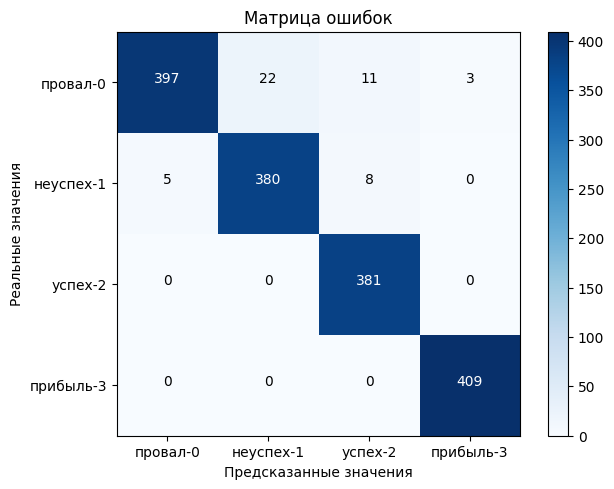

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Создаем матрицу ошибок
confusion_matrix = np.array([[397, 22, 11, 3],
                             [5, 380, 8, 0],
                             [0, 0, 381, 0],
                             [0, 0, 0, 409]])

# Создаем список меток классов
labels = ["провал-0", "неуспех-1", "успех-2", "прибыль-3"]

# Отображение матрицы ошибок
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Матрица ошибок")
plt.colorbar()

# Добавляем метки осей
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Добавляем числа в ячейки
thresh = confusion_matrix.max() / 2.
for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
    plt.text(j, i, format(confusion_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_matrix[i, j] > thresh else "black")

# Делаем красивые настройки
plt.tight_layout()
plt.ylabel("Реальные значения")
plt.xlabel("Предсказанные значения")

plt.show()

In [28]:
from sklearn.metrics import roc_curve, auc

# Построение графика ROC-AUC
y_pred_proba = model.predict(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = y.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Рассчитываем макро-усредненное значение roc_auc
roc_auc_macro = np.mean(list(roc_auc.values()))


51/51 [==============================] - 0s 2ms/step


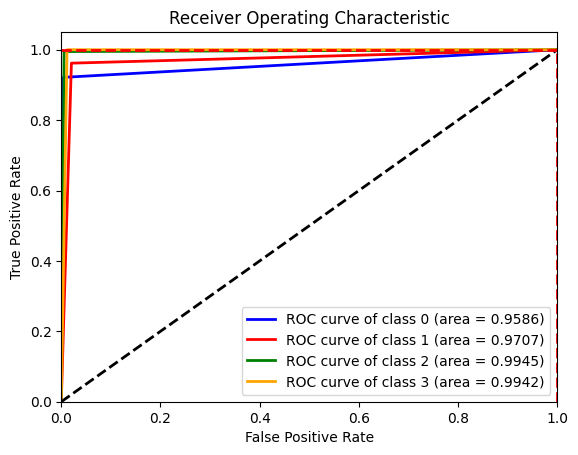

In [29]:
# Построение графика
plt.figure()
colors = ['blue', 'red', 'green', 'orange'] # Цвета для каждого класса
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2) # Случайная модель
plt.plot([0, 1], [1, 1], 'k--', lw=2, color='red')
plt.plot([1, 1], [0, 1], 'k--', lw=2, color='red')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()